In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CS506 - Team 2 Project 

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt # we can also use seaborn for prettier graphs or bokeh for interactive graphs 
import statistics as stat

# Data preprocessing

In [ ]:
DATASET_PATH = '/content/drive/Shareddrives/CS506_Team/Data/Blake_RPD_Dataset-2.xlsx'
df = pd.read_excel(DATASET_PATH, "data") # data is the sheet name
df

# gender: male = 0. female = 1
# location: remote = 0. in classrom = 1
# cooperation = 0. defection = 1

# tfti = Decision made in ith round when facing Tit for Tat Partner.
# TFT partner cooperates on the 1st round and then repeats the child's decision in following rounds

# coopi = Decision made in ith round when facing cooperative Partner.
# Coop partner cooperates on all rounds BUT defects on rounds 3 & 7

# defi = Decision made in ith round when facing the defective partner.
# Def partner defects on all rounds BUT cooperates on rounds 3 & 7.

,RPD_code,Age_months,Age_years,Gender,Location,P-SDQ_Conduct,P-SDQ_Emo,P-SDQ_Hyper,P-SDQ_Peer,P-SDQ_Procosial,P-SDQ_Total_Problems,P-Proactive_aggr,P-Reactive_aggr,P-Aggression_Total,Order,tft1,tft_rt1,tft2,tft_rt2,tft3,tft_rt3,tft4,tft_rt4,tft5,tft_rt5,tft6,tft_rt6,tft7,tft_rt7,tft8,tft_rt8,tft9,tft_rt9,tft10,tft_rt10,coop1,coop_rt1,coop2,coop_rt2,coop3,coop_rt3,coop4,coop_rt4,coop5,coop_rt5,coop6,coop_rt6,coop7,coop_rt7,coop8,coop_rt8,coop9,coop_rt9,coop10,coop_rt10,def1,def_rt1,def2,def_rt2,def3,def_rt3,def4,def_rt4,def5,def_rt5,def6,def_rt6,def7,def_rt7,def8,def_rt8,def9,def_rt9,def10,def_rt10
0,1J0NDS,130,10,1,0,2.0,7.0,0.0,1.0,8.0,10,1.0,7.0,8.0,1,1,1.39,1,3.45,0,1.13,1,6.01,0,1.35,0,1.54,1,2.77,0,1.87,0,3.43,1,9.97,1,2.64,1,1.09,1,1.20,0,0.60,0,1.64,0,2.07,1,1.77,1,1.15,0,2.17,1,3.58,1,2.48,0,1.18,1,1.35,0,2.25,0,1.21,0,1.29,1,0.92,0,3.27,0,4.81,0,1.82
1,1J3aGy,142,11,1,0,2.0,6.0,1.0,4.0,9.0,13,1.0,3.0,4.0,1,1,4.94,1,3.68,1,0.82,1,0.31,1,1.37,1,0.36,1,0.99,1,0.81,1,0.62,1,3.68,0,4.81,1,1.73,1,4.79,0,2.80,1,1.39,0,2.39,1,1.19,1,0.93,1,0.62,1,0.36,0,0.22,0,1.61,0,1.30,1,1.74,0,1.22,0,0.45,0,0.85,1,1.00,0,0.60,0,1.08
2,1yfy8K,122,10,1,0,1.0,0.0,1.0,0.0,6.0,2,0.0,1.0,1.0,0,1,3.50,0,5.06,0,3.48,1,2.61,1,1.90,0,2.15,0,2.87,0,7.77,1,4.48,0,1.39,0,1.82,0,1.03,0,0.45,0,0.49,0,0.42,0,0.66,0,0.61,0,1.42,0,0.76,0,1.17,1,3.91,0,1.90,0,2.73,0,1.71,0,0.45,0,0.73,0,0.16,0,1.00,0,0.35,0,0.43
3,2ER9VQ,109,9,1,0,1.0,3.0,0.0,2.0,10.0,6,0.0,4.0,4.0,0,0,8.86,0,5.91,0,6.96,0,2.64,0,2.73,0,4.65,1,11.43,0,2.64,0,2.64,0,0.27,0,1.59,0,2.80,0,5.92,0,3.83,0,3.26,0,1.54,0,0.97,0,1.96,0,1.32,0,0.83,0,1.27,0,0.97,0,0.64,0,3.78,0,2.55,0,0.58,0,4.04,0,1.60,0,1.59,0,11.78
4,2r04de,110,9,0,0,0.0,1.0,0.0,1.0,10.0,2,0.0,1.0,1.0,1,1,0.99,1,2.54,0,1.89,1,1.84,1,0.81,0,3.05,0,1.59,0,5.02,0,0.55,0,4.00,0,3.86,1,1.34,0,1.14,1,0.35,1,0.76,1,0.52,1,1.33,0,0.82,1,1.46,0,1.70,1,1.51,0,0.36,0,0.29,0,0.99,0,0.61,0,0.28,0,0.26,1,0.31,0,0.26,0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Z4GB1Z,133,11,0,0,1.0,4.0,1.0,4.0,6.0,10,0.0,3.0,3.0,0,0,3.35,0,10.59,1,2.05,1,3.83,0,3.25,1,1.32,1,3.42,1,3.90,0,3.44,1,9.88,1,11.59,1,1.09,1,0.48,1,1.44,0,0.80,0,1.68,1,0.94,0,0.77,0,1.93,1,3.76,1,0.79,0,1.35,0,2.01,0,1.42,1,0.88,0,1.78,0,2.54,0,2.53,1,0.54,0,1.27
163,zARNzA,114,9,0,1,3.0,5.0,4.0,5.0,3.0,17,1.0,6.0,7.0,1,0,6.20,0,0.21,0,0.01,0,0.10,0,0.93,0,0.05,0,0.24,0,0.15,0,0.11,0,0.15,0,0.20,0,0.03,0,0.22,0,0.25,0,0.02,0,0.07,0,0.12,0,0.11,0,0.24,0,0.27,0,0.05,0,0.04,0,0.01,0,0.11,0,0.09,0,0.08,0,0.05,0,0.38,0,0.37,0,0.18
164,zHDAMO,134,11,1,0,0.0,2.0,0.0,1.0,10.0,3,0.0,0.0,0.0,0,0,3.67,0,3.73,0,1.69,0,1.17,0,1.99,0,0.17,0,2.14,0,0.82,0,0.86,0,9.78,0,6.58,0,1.05,0,1.16,0,0.92,0,0.73,0,0.75,0,0.89,0,0.49,0,1.49,0,0.88,0,0.12,0,1.48,0,0.71,0,0.55,0,0.58,0,0.34,0,0.87,0,2.06,0,0.37,0,0.57
165,ZLEEv9,133,11,1,0,2.0,0.0,4.0,1.0,9.0,7,0.0,3.0,3.0,1,1,2.09,0,6.23,1,0.96,1,5.50,0,9.47,1,3.29,0,1.50,1,4.76,0,4.18,1,4.10,1,1.76,1,4.12,1,1.33,0,1.04,1,1.57,1,0.78,1,0.74,0,1.26,1,1.11,1,1.64,1,1.34,0,0.72,0,2.44,1,0.62,0,2.52,0,0.93,1,3.46,1,3.73,0,1.28,0,0.42


In [ ]:
# Here, I generate list of column names for easy access:

tft = ['tft' + str(i) for i in range(1,11)]
tft_rt = ['tft_rt' + str(i) for i in range(1,11)]
coop = ['coop' + str(i) for i in range(1,11)]
coop_rt = ['coop_rt' + str(i) for i in range(1,11)]
defs = ['def' + str(i) for i in range(1,11)]
def_rt = ['def_rt' + str(i) for i in range(1,11)]

features = [tft, tft_rt, coop, coop_rt, defs, def_rt]

In [ ]:
# Now you can simply call the data frame + feature name. Try it!
df[tft]

,tft1,tft2,tft3,tft4,tft5,tft6,tft7,tft8,tft9,tft10
0,1,1,0,1,0,0,1,0,0,1
1,1,1,1,1,1,1,1,1,1,1
2,1,0,0,1,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0
4,1,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
162,0,0,1,1,0,1,1,1,0,1
163,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0
165,1,0,1,1,0,1,0,1,0,1


In [ ]:
#Dropping rows with NaN values:

dropped_len = df.shape[0] - df.dropna().shape[0] 
data = df.dropna() #Now, we have a clean data frame. 

print('Number of datapoints dropped:', dropped_len)

Number of datapoints dropped: 23


In [ ]:
# Calculating averages - feel free to manipulate 
# these dataframes however way you see fit
df['tft_avg'] = df[tft].mean(axis=1)
df['tft_rt_avg'] = df[tft_rt].mean(axis=1)
df['coop_avg'] = df[coop].mean(axis=1)
df['coop_rt_avg'] = df[coop_rt].mean(axis=1)
df['def_avg'] = df[defs].mean(axis=1)
df['def_rt_avg'] = df[def_rt].mean(axis=1)

avgs = ['tft_avg','tft_rt_avg','coop_avg','coop_rt_avg','def_avg','def_rt_avg']
df[avgs]

,tft_avg,tft_rt_avg,coop_avg,coop_rt_avg,def_avg,def_rt_avg
0,0.5,3.291,0.6,1.791,0.3,2.058
1,1.0,1.758,0.7,2.101,0.2,1.007
2,0.4,3.521,0.0,0.883,0.1,1.337
3,0.1,4.873,0.0,2.402,0.0,2.880
4,0.4,2.228,0.6,1.328,0.2,0.565
...,...,...,...,...,...,...
162,0.6,4.503,0.6,2.448,0.3,1.511
163,0.0,0.815,0.0,0.153,0.0,0.136
164,0.0,2.602,0.0,1.494,0.0,0.765
165,0.6,4.208,0.8,1.535,0.4,1.746


In [ ]:
# a row of column means
col_means = df.mean()
col_means

Age_months       124.886228
Age_years          9.964072
Gender             0.491018
Location           0.347305
P-SDQ_Conduct      1.152866
                    ...    
tft_rt_avg         3.186317
coop_avg           0.386826
coop_rt_avg        2.226731
def_avg            0.238922
def_rt_avg         1.902246
Length: 80, dtype: float64

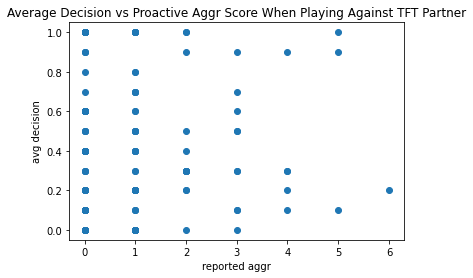

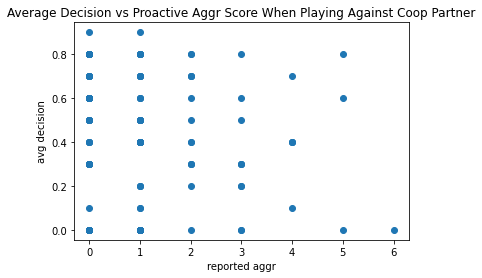

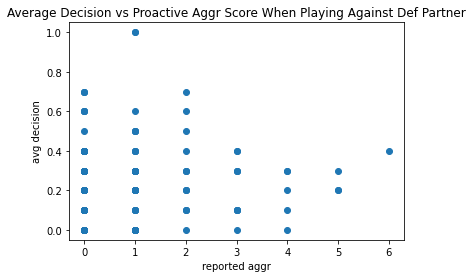

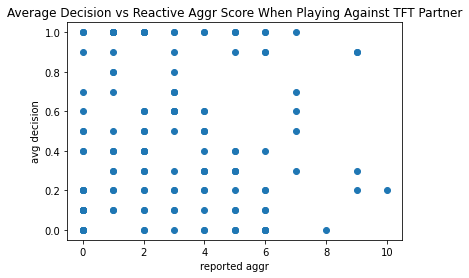

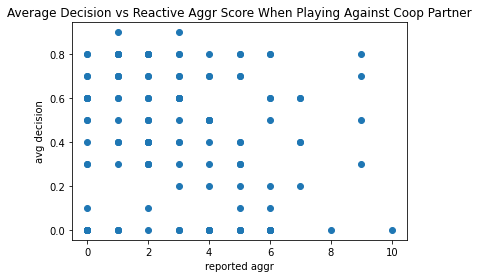

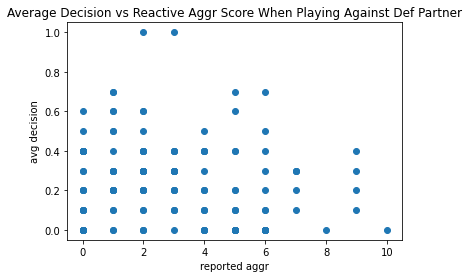

In [ ]:
# Whether children are naturally cooperative/defiant as their parents reported
def scatter_plt(x,y,xlabel,ylabel,title):
  plt.scatter(x,y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()
  plt.close()

proactive_aggr = list(df['P-Proactive_aggr'])
reactive_aggr = list(df['P-Reactive_aggr'])
tft_avg = list(df['tft_avg'])
coop_avg = list(df['coop_avg'])
def_avg = list(df['def_avg'])
scatter_plt(proactive_aggr,tft_avg,'reported aggr','avg decision','Average Decision vs Proactive Aggr Score When Playing Against TFT Partner')
scatter_plt(proactive_aggr,coop_avg,'reported aggr','avg decision','Average Decision vs Proactive Aggr Score When Playing Against Coop Partner')
scatter_plt(proactive_aggr,def_avg,'reported aggr','avg decision','Average Decision vs Proactive Aggr Score When Playing Against Def Partner')
scatter_plt(reactive_aggr,tft_avg,'reported aggr','avg decision','Average Decision vs Reactive Aggr Score When Playing Against TFT Partner')
scatter_plt(reactive_aggr,coop_avg,'reported aggr','avg decision','Average Decision vs Reactive Aggr Score When Playing Against Coop Partner')
scatter_plt(reactive_aggr,def_avg,'reported aggr','avg decision','Average Decision vs Reactive Aggr Score When Playing Against Def Partner')

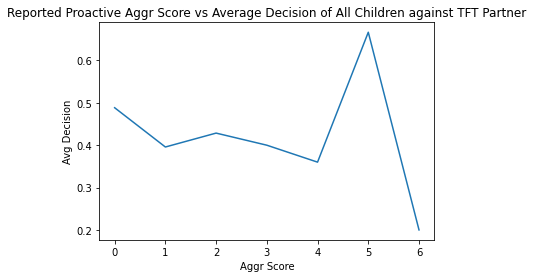

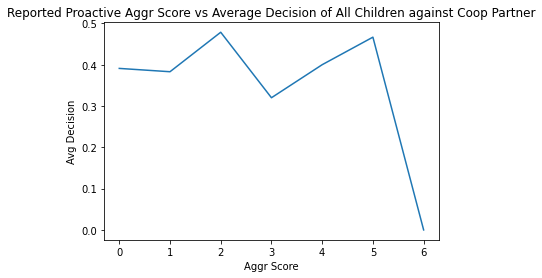

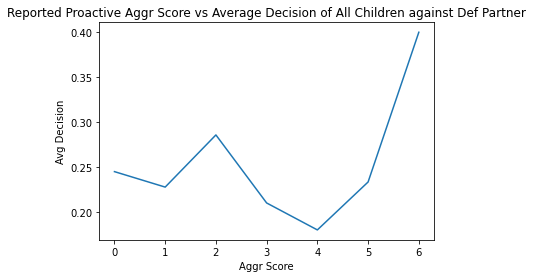

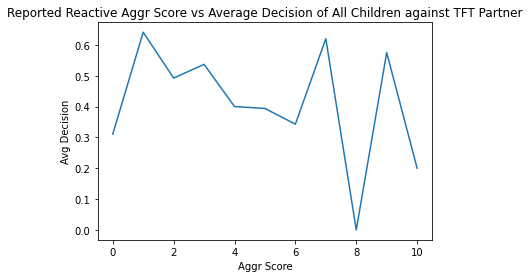

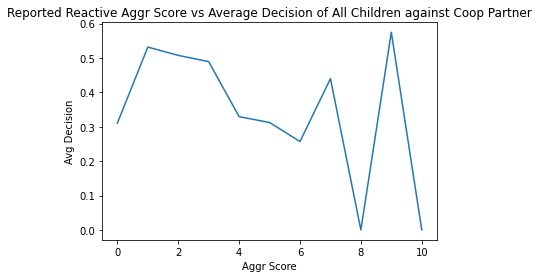

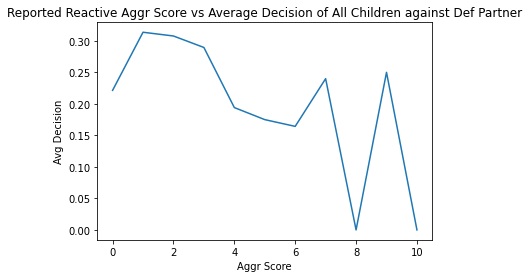

In [ ]:
def Aggr_DecAvg_Plot(reported_aggr,dec_avg,title):
  l = [(0,0)] * 20
  for child in range(len(reported_aggr)):
    if reported_aggr[child] != reported_aggr[child]:
      continue
    i = int(reported_aggr[child])
    sum_dec,count = l[i]
    sum_dec += dec_avg[child]
    count += 1
    l[i] = (sum_dec,count)
  aggr_dec_avg = []
  for i in range(len(l)):
    sum_dec,count = l[i]
    if count == 0:
      break;
    aggr_dec_avg.append(sum_dec/count)
  aggr_scores = range(len(aggr_dec_avg))
  plt.plot(aggr_scores,aggr_dec_avg)
  plt.xlabel('Aggr Score')
  plt.ylabel('Avg Decision')
  plt.title(title)
  plt.show()
  plt.close

Aggr_DecAvg_Plot(proactive_aggr,tft_avg,'Reported Proactive Aggr Score vs Average Decision of All Children against TFT Partner')
Aggr_DecAvg_Plot(proactive_aggr,coop_avg,'Reported Proactive Aggr Score vs Average Decision of All Children against Coop Partner')
Aggr_DecAvg_Plot(proactive_aggr,def_avg,'Reported Proactive Aggr Score vs Average Decision of All Children against Def Partner')
Aggr_DecAvg_Plot(reactive_aggr,tft_avg,'Reported Reactive Aggr Score vs Average Decision of All Children against TFT Partner')
Aggr_DecAvg_Plot(reactive_aggr,coop_avg,'Reported Reactive Aggr Score vs Average Decision of All Children against Coop Partner')
Aggr_DecAvg_Plot(reactive_aggr,def_avg,'Reported Reactive Aggr Score vs Average Decision of All Children against Def Partner')

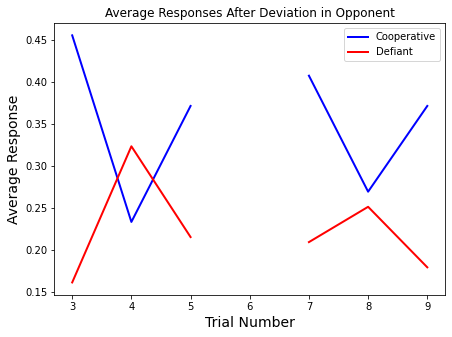

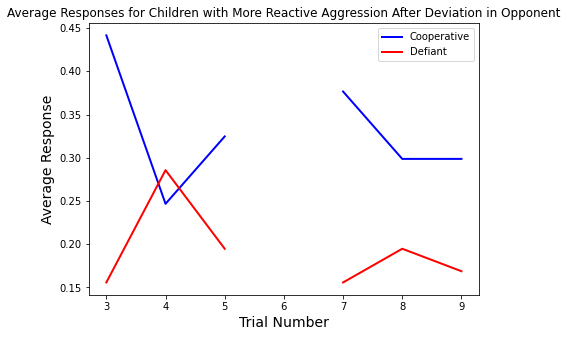

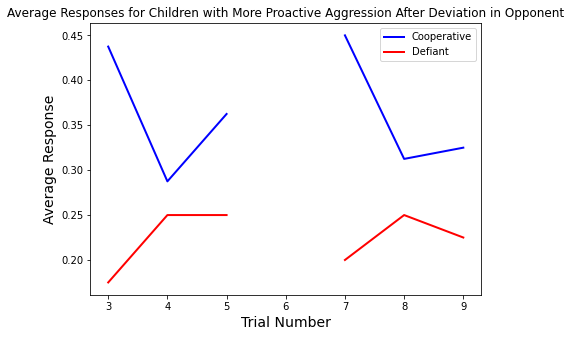

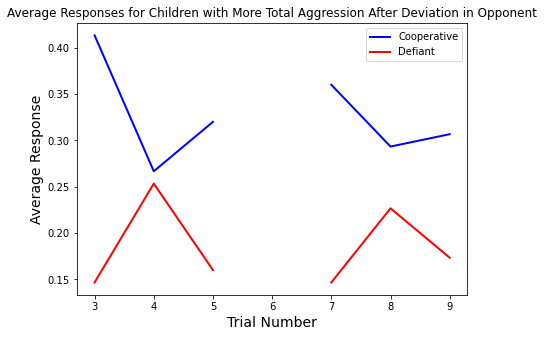

In [ ]:
# Change in children after deviation
plt.figure(num=None,figsize=(7, 5))
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Average Response', fontsize=14)
y = [df['coop' + str(x)].mean() for x in range(3,6)]
plt.plot([3,4,5],y,color='blue',linewidth=2,label="Cooperative")
y = [df['coop' + str(x)].mean() for x in range(7,10)]
plt.plot([7,8,9],y,color='blue',linewidth=2)
y = [df['def' + str(x)].mean() for x in range(3,6)]
plt.plot([3,4,5],y,color='red',linewidth=2,label="Defiant")
y = [df['def' + str(x)].mean() for x in range(7,10)]
plt.plot([7,8,9],y,color='red',linewidth=2)
plt.legend()
plt.title('Average Responses After Deviation in Opponent')
plt.show()

# Change in children with more reactive aggression after deviation
plt.figure(num=None,figsize=(7, 5))
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Average Response', fontsize=14)
y = []
helper = []
helper_mean = 0
for i in df['P-Reactive_aggr'].iteritems():
  if i[1] >= 3:
    helper.append(i[0])
for x in range(3,6):
  values = df['coop' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([3,4,5],y,color='blue',linewidth=2,label="Cooperative")
y = []
for x in range(7,10):
  values = df['coop' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([7,8,9],y,color='blue',linewidth=2)
y = []
for x in range(3,6):
  values = df['def' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([3,4,5],y,color='red',linewidth=2,label="Defiant")
y = []
for x in range(7,10):
  values = df['def' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([7,8,9],y,color='red',linewidth=2)
plt.legend()
plt.title('Average Responses for Children with More Reactive Aggression After Deviation in Opponent')
plt.show()

# Change in children with more proactive aggression after deviation
plt.figure(num=None,figsize=(7, 5))
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Average Response', fontsize=14)
y = []
helper = []
helper_mean = 0
for i in df['P-Proactive_aggr'].iteritems():
  if i[1] >= 1:
    helper.append(i[0])
for x in range(3,6):
  values = df['coop' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([3,4,5],y,color='blue',linewidth=2,label="Cooperative")
y = []
for x in range(7,10):
  values = df['coop' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([7,8,9],y,color='blue',linewidth=2)
y = []
for x in range(3,6):
  values = df['def' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([3,4,5],y,color='red',linewidth=2,label="Defiant")
y = []
for x in range(7,10):
  values = df['def' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([7,8,9],y,color='red',linewidth=2)
plt.legend()
plt.title('Average Responses for Children with More Proactive Aggression After Deviation in Opponent')
plt.show()

# Change in children with more total aggression after deviation
plt.figure(num=None,figsize=(7, 5))
plt.xlabel('Trial Number', fontsize=14)
plt.ylabel('Average Response', fontsize=14)
y = []
helper = []
helper_mean = 0
for i in df['P-Aggression_Total'].iteritems():
  if i[1] >= 4:
    helper.append(i[0])
for x in range(3,6):
  values = df['coop' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([3,4,5],y,color='blue',linewidth=2,label="Cooperative")
y = []
for x in range(7,10):
  values = df['coop' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([7,8,9],y,color='blue',linewidth=2)
y = []
for x in range(3,6):
  values = df['def' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([3,4,5],y,color='red',linewidth=2,label="Defiant")
y = []
for x in range(7,10):
  values = df['def' + str(x)].values
  for i in helper:
    helper_mean += values[i]
  y.append(helper_mean/len(helper))
  helper_mean = 0
plt.plot([7,8,9],y,color='red',linewidth=2)
plt.legend()
plt.title('Average Responses for Children with More Total Aggression After Deviation in Opponent')
plt.show()


Cooperative reaction times:  [1.13, 1.35, 1.54, 1.87, 3.43]
Defection reaction times:  [1.39, 3.45, 6.01, 2.77, 9.97]


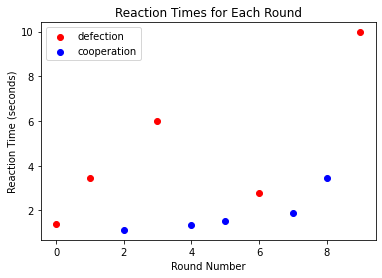

cooperative


'\nA preliminary determination of a participant’s state was constructed using the difference in reaction times between cooperation and defection choices in subsequent rounds. \nIn addition to raw cooperation and defection data, this model will be useful in investigating the long-term change in a participant’s preference over many rounds. \nThe preliminary model assesses relative reaction times after a round specified by the user. In the future, this function will take into account the overall trends in reaction time. \nAdditionally, the model does not account for roughly equal cooperative and uncooperative reaction times. \nWhat constitutes roughly equal reaction times will need to be discussed with Peter. There seems to be significant differences between cooperative and uncooperative reaction times for many participants. \nA formal drift diffusion model will eventually be required for a rigorous analysis of the primary research questions covered in this project. \n\n'

In [ ]:
#Takes processed dataframe and isolates reaction times and game choices for a single participant at a specific index point.
def isolate_participant(df, patient_index): 
  patient_df=df.iloc[patient_index]
  return patient_df[tft], patient_df[tft_rt]
[actions, reaction_times]=isolate_participant(df, 0)

#Determines state based on differences in reaction times from a starting point. The eval point is used to determine the participant's state after a given round. 
def determine_state(reaction_times, actions, eval_point):
    defect_times=[]
    defect_rounds=[]
    cooperate_times=[]
    cooperate_rounds=[]
    #At the moment, there is no consideration for a "balanced state" where reaction times for cooperation and defection are roughly equal. 
    #Discussion about what constitutes distinctively different reaction times to come.
    for i, (action, time) in enumerate(zip(actions, reaction_times)):
      if i >= eval_point:
        if action == 1:
          defect_times.append(time)
          defect_rounds.append(i)
        if action ==0:
          cooperate_times.append(time)
          cooperate_rounds.append(i)
    assert len(cooperate_rounds)>0, "Data must contain at least one cooperative round"
    assert len(defect_rounds)>0, "Data must contain at least one uncooperative round" 
    print('Cooperative reaction times: ', cooperate_times)
    print('Defection reaction times: ', defect_times)
    plt.scatter(defect_rounds, defect_times, c = 'red', label='defection')
    plt.scatter(cooperate_rounds, cooperate_times, c = 'blue', label='cooperation')
    plt.title("Reaction Times for Each Round")
    plt.xlabel('Round Number')
    plt.ylabel('Reaction Time (seconds)')
    plt.legend()
    plt.show()
    if stat.mean(defect_times) > stat.mean(cooperate_times):
      return 'cooperative'
    if stat.mean(cooperate_times) > stat.mean(defect_times):
      return 'uncooperative'
    else:
      return 'Could not determine state'

print(determine_state(reaction_times, actions, 0))

"""
A preliminary determination of a participant’s state was constructed using the difference in reaction times between cooperation and defection choices in subsequent rounds. 
In addition to raw cooperation and defection data, this model will be useful in investigating the long-term change in a participant’s preference over many rounds. 
The preliminary model assesses relative reaction times after a round specified by the user. In the future, this function will take into account the overall trends in reaction time. 
Additionally, the model does not account for roughly equal cooperative and uncooperative reaction times. 
What constitutes roughly equal reaction times will need to be discussed with Peter. There seems to be significant differences between cooperative and uncooperative reaction times for many participants. 
A formal drift diffusion model will eventually be required for a rigorous analysis of the primary research questions covered in this project. 

"""
